In [1]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
from scipy import stats
import pandas as pd
from config import api_key
from citipy import citipy
import numpy as np
from scipy.stats import linregress

In [2]:
# defining url, unit of measurement, and importing cityPy dataset
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

all_cities = pd.read_csv('Resource/worldcities.csv', usecols = ['Latitude', 'Longitude'])



In [3]:
#checking new dataframe
all_cities.head()

Latitude  Longitude
0  42.500000   1.516667
1  42.566667   1.600000
2  42.533333   1.583333
3  42.550000   1.516667
4  42.500000   1.533333

In [4]:
# getting random, non-repeating coordinates.
rows = np.random.choice(range(46832), size=500, replace=False)

In [5]:
# creating a list of coordinates to be used in plotting visualisations
coords = []

for row in rows:
    coords.append((all_cities.iloc[row][0], all_cities.iloc[row][1]))

In [6]:
# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}"

In [7]:
# set up lists to hold reponse info
lat = []
lon = []
temp = []
humidity = []
cloud = []
wind_speed = []
name = []

for i in range(0,500,50): #10 times
    print("start=>" + str(i) + ", end=>" + str(i + 49))
    

    # Loop through the list of coordinates and perform a request for data on each
    for j in range(i, i+50):
        response = requests.get(query_url + "&lat="+str(coords[j][0])+"&lon="+str(coords[j][1])).json()  
        lat.append(coords[j][0])
        lon.append(coords[j][1])
        temp.append(response['main']['temp'])
        humidity.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        name.append(response['name'])
    
    if i <= 451:
        time.sleep(61)

print("done!")

start=>0, end=>49
start=>50, end=>99
start=>100, end=>149
start=>150, end=>199
start=>200, end=>249
start=>250, end=>299
start=>300, end=>349
start=>350, end=>399
start=>400, end=>449
start=>450, end=>499
done!


In [9]:
# create an overall weather dataframe from data found in previous for loop.
weather_dict = {
    "City": name,
    "Latitude": lat,
    "Longitude": lon,
    "Temperature": temp,
    "Humidity": humidity,
    "Cloudiness": cloud,
    "Wind Speed": wind_speed
     
}
weather_data = pd.DataFrame(weather_dict)

weather_data.to_csv('output_data/weather_data.csv')

weather_data

City   Latitude   Longitude  Temperature  Humidity  Cloudiness  \
0    Park Ridge  42.011111  -87.840556        72.61        53           1   
1    Morant Bay  17.883333  -76.416667        83.46        70          20   
2         Taşca  46.900000   26.016667        43.00        72         100   
3    Nové Hrady  48.790466   14.778111        51.62        47          63   
4          Zula  44.366667   11.333333        55.74        82          75   
..          ...        ...         ...          ...       ...         ...   
495      Mouila  -1.866667   11.016667        83.77        74         100   
496     Soreang  -7.033056  107.518333        71.01        93         100   
497    Mwandiga  -4.830000   29.658056        77.00        78          75   
498     Cordova  10.251944  123.949444        78.80        78          90   
499     Murrião  38.666667   -9.200000        65.64        60          40   

     Wind Speed  
0         13.80  
1          5.75  
2          4.00  
3         11.01  
4          5.75  
..          ...  
495        3.87  
496        1.01  
497        6.35  
498        4.61  
499       11.50  

[500 rows x 7 columns]

In [10]:
# create a dataframe for cities in the Southern Hemisphere
weather_south = weather_data[weather_data['Latitude']<0]

weather_south

City   Latitude   Longitude  Temperature  Humidity  \
20                 Mponela -13.516667   33.716667        69.75        81   
21              Vohibinany -17.350000   49.033333        71.85        98   
27         Ribeirão Bonito -22.066667  -48.166667        81.41        46   
50         Ciranjang-hilir  -6.698333  107.275278        73.45        78   
68              Klerksdorp -26.852128   26.666719        79.16        15   
71              Itapetinga -15.250000  -40.250000        85.87        43   
74            Capitán Meza -27.016667  -55.566667        64.99        59   
76             Santo Amaro -12.533333  -38.716667        84.20        61   
87          Rosário do Sul -30.250000  -54.916667        66.24        53   
90                 Okondja  -0.683333   13.783333        86.41        64   
106                Lembang  -6.786389  107.702500        71.01        93   
125                 Cilaos -21.116667   55.466667        76.08        78   
127           Muswellbrook -32.261181  150.890091        52.00        82   
133             Tolaga Bay -37.883333  178.333333        53.01        89   
150               Kutoarjo  -7.716944  109.912778        60.01       100   
153              Morrinhos -17.733333  -49.116667        81.64        35   
156           Río Gallegos -51.622613  -69.218127        51.80        66   
163                  Anori  -3.783333  -61.633333        82.78        78   
167          Carlos Chagas -17.716667  -40.750000        89.38        36   
173              Kimbalata  -7.050000   29.783333        75.85        79   
179                  Caála -12.852500   15.560556        69.22        60   
182           Espera Feliz -20.650000  -41.916667        74.73        72   
191             San Felipe -32.750000  -70.733333        66.00        47   
202                  Paján  -1.566667  -80.416667        79.03        83   
203                  Baião  -2.683333  -49.683333        89.55        57   
209                 Seabra -12.416667  -41.766667        80.60        57   
214              Busselton -33.652489  115.345497        58.78        91   
217             Cileungsir  -6.448333  107.120556        81.34        78   
240  Santo Antônio do Tauá  -1.183333  -48.133333        86.00        70   
243                  Soure  -0.733333  -48.516667        82.69        72   
254         Elesbão Veloso  -6.216667  -42.133333        91.35        45   
258                Mchinji -13.716667   32.900000        68.02        85   
274             Natividade -21.050000  -41.983333        78.31        71   
295                 Tanabi -20.616667  -49.616667        80.60        39   
305                Marotse -24.716667   25.533333        87.80        12   
308                  Jatai -17.883333  -51.716667        82.17        45   
310               Caranavi -15.816667  -67.550000        69.91        63   
311                Peruíbe -24.316667  -47.000000        69.49        93   
321                 Arenal  -7.633333  -72.600000        73.40        94   
330               Ranfurly -45.133333  170.100000        28.99        94   
333                  Patos  -7.016667  -37.266667        92.17        32   
344                Massapê  -3.516667  -40.316667        86.09        64   
353  Senador José Porfírio  -2.583333  -51.916667        82.69        72   
381                  Ngoro  -7.689900  112.270900        84.20        74   
395                  Mbumi  -7.900000   39.200000        77.65        89   
402               Macusani -14.083333  -70.433333        47.52        51   
423              Paracambi -22.608611  -43.712778        80.60        65   
429                 Tarime  -1.350000   34.366667        80.60        65   
434                  Caraí -17.200000  -41.700000        82.81        42   
440                Extrema -22.850000  -46.316667        72.70        64   
449           Bahía Blanca -38.719595  -62.272432        68.29        52   
457               Itápolis -21.583333  -48.766667        84.61        

In [11]:
# create a dataframe for cities in Northern Hemisphere
weather_north = weather_data[weather_data['Latitude']>=0]

weather_north.head()

City   Latitude  Longitude  Temperature  Humidity  Cloudiness  \
0  Park Ridge  42.011111 -87.840556        72.61        53           1   
1  Morant Bay  17.883333 -76.416667        83.46        70          20   
2       Taşca  46.900000  26.016667        43.00        72         100   
3  Nové Hrady  48.790466  14.778111        51.62        47          63   
4        Zula  44.366667  11.333333        55.74        82          75   

   Wind Speed  
0       13.80  
1        5.75  
2        4.00  
3       11.01  
4        5.75

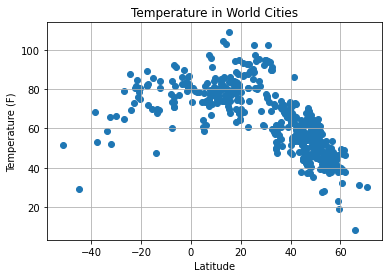

In [24]:
# Create a Scatter Plot for temperature vs. latitude
plt.scatter(weather_data["Latitude"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Fig1.png')

# Show plot
plt.show()



In [ ]:
#this plot shows that cities near the equator tend to have a higher temperature

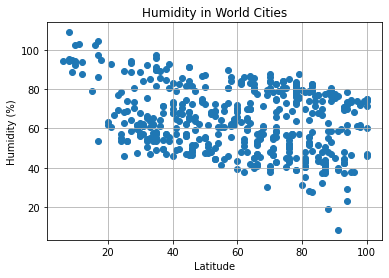

In [25]:
# Create a Scatter Plot for humidity vs. latitude
plt.scatter(weather_data["Humidity"], weather_data["Temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Fig2.png')

# Show plot
plt.show()

In [ ]:
# this plot shows that the closer the city is to the equator the higher the humidity.

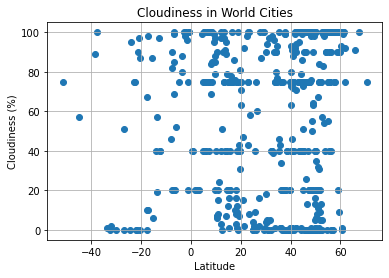

In [26]:
# Create a Scatter Plot for cloudiness vs. latitude
plt.scatter(weather_data["Latitude"], weather_data["Cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("Cloudiness in World Cities")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Fig3.png')

# Show plot
plt.show()

In [ ]:
# this plot shows that no discernible pattern can be observed

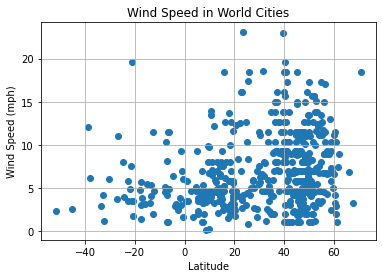

In [27]:
# Create a Scatter Plot for wind speed vs. latitude
plt.scatter(weather_data["Latitude"], weather_data["Wind Speed"], marker="o")

# Incorporate the other graph properties
plt.title("Wind Speed in World Cities")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

plt.savefig('output_data/Fig4.png')

# Show plot
plt.show()

In [ ]:
# this plot shows that wind speed is equally varied in the northern and southern hemispheres

In [16]:
# create a function to plot linear regression
def lcharts(title, x_values, y_values, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = stats.linregress(x_values, y_values)
    
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))

    r_values = x_values * slope + intercept
    plt.scatter(x_values, y_values)
    plt.plot(x_values,r_values,"r-")

    # Label plot and annotate the line equation
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.annotate(line_eq,(20,15),fontsize=15,color="red")
    
    plt.show()

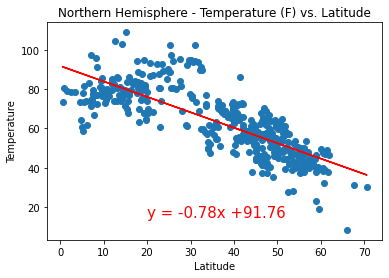

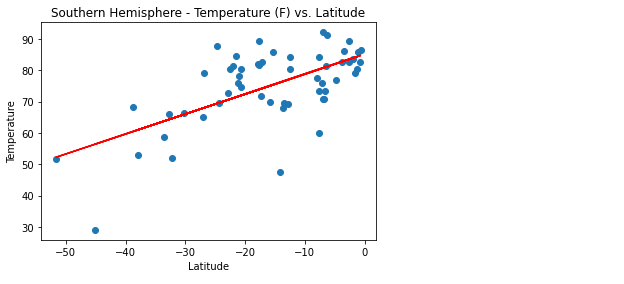

In [23]:
# linear regression for Temperature vs Latitude
lcharts("Northern Hemisphere - Temperature (F) vs. Latitude", weather_north["Latitude"], weather_north["Temperature"],
        'Temperature')

lcharts("Southern Hemisphere - Temperature (F) vs. Latitude", weather_south["Latitude"], weather_south["Temperature"],
        'Temperature')


In [ ]:
# this pair of plots show that temperature is inversely proportional

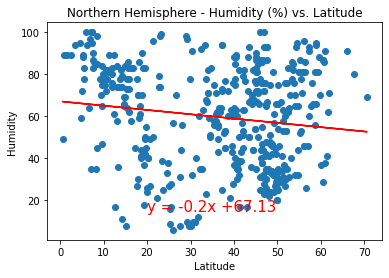

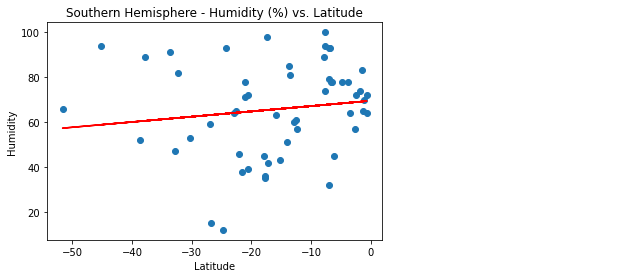

In [18]:
# linear regression for Humidity vs Latitude
lcharts("Northern Hemisphere - Humidity (%) vs. Latitude", weather_north["Latitude"], weather_north["Humidity"],
        'Humidity')

lcharts("Southern Hemisphere - Humidity (%) vs. Latitude", weather_south["Latitude"], weather_south["Humidity"],
        'Humidity')

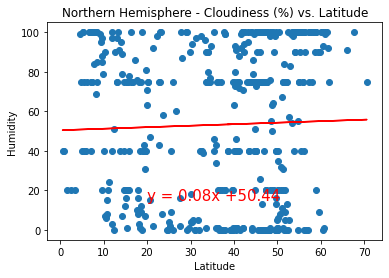

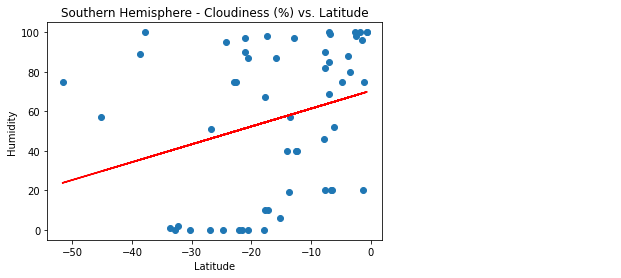

In [19]:
# linear regression for Cloudiness vs Latitude
lcharts("Northern Hemisphere - Cloudiness (%) vs. Latitude", weather_north["Latitude"], weather_north["Cloudiness"],
        'Humidity')

lcharts("Southern Hemisphere - Cloudiness (%) vs. Latitude", weather_south["Latitude"], weather_south["Cloudiness"],
        'Humidity')

In [ ]:
#cloudiness, still does not show a discernible pattern

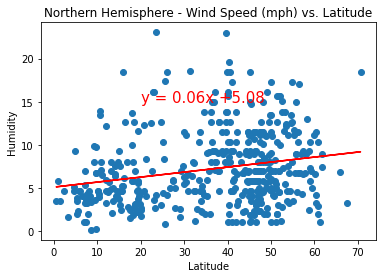

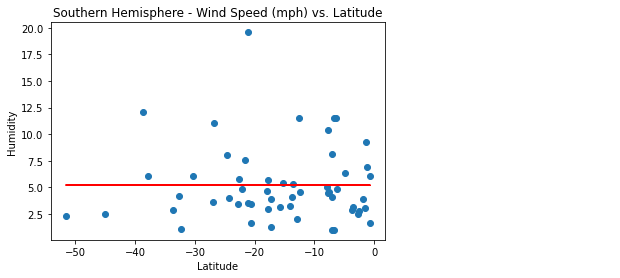

In [20]:
# linear regression for Wind Speed vs Latitude
lcharts("Northern Hemisphere - Wind Speed (mph) vs. Latitude", weather_north["Latitude"], weather_north["Wind Speed"],
        'Humidity')

lcharts("Southern Hemisphere - Wind Speed (mph) vs. Latitude", weather_south["Latitude"], weather_south["Wind Speed"],
        'Humidity')

In [ ]:
# we do not have enough data points in the southern hemisphere to make a resonable observation